In [1]:
import numpy as np
from datetime import datetime, date
from datetime import timedelta
from scipy.optimize import minimize
from scipy.stats import norm
import pandas as pd
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv( "C:/Users/José Miguel/Documents/cecy/Diplomado/data-science-master/datos_yolanda.csv")
datos.head()

,DATE,ASURB MF Equity,GFNORTEO MF Equity,PE&OLES* MF Equity,WALMEX* MF Equity,IENOVA* MF Equity,CEMEXCPO MF Equity,FEMSAUBD MF Equity,MEXBOL INDEX
0,01/01/2016,243.89,94.99,177.22,43.49,72.34,8.72,161.63,42977.50
1,04/01/2016,238.29,91.79,175.90,42.84,72.98,8.43,157.62,42113.70
2,05/01/2016,233.03,91.72,176.45,42.66,71.48,8.31,157.80,42041.68
3,06/01/2016,231.97,91.63,172.68,42.38,70.94,8.29,156.37,41691.19
4,07/01/2016,230.71,89.54,172.94,39.99,72.31,7.64,155.14,40661.57


# Pregunta 1: Rendimiento esperado diario y anual bajo los siguientes modelos:

a. Modelo de rendimiento promedio constante

In [3]:
#tabla de rendimientos
def rendimientos (tabla, tipo, periodo):
    ''' tipo = resta si se calcula el rendimiento por restas, o log si es por medio de la diferencia de logaritmos
        periodo= diaria o anual'''      
    columnas = len(tabla.iloc[0,:])
    tabla_new = pd.DataFrame(columns = tabla.columns)
    tabla_new.iloc[:,0] = tabla.iloc[1:,0] # valor de las fechas
    if tipo == "resta":
        for i in range(columnas -1):
            tabla_new.iloc[:,i+1] = ((tabla.iloc[:,i+1]-tabla.iloc[:,i+1].shift(1))/tabla.iloc[:,i+1].shift(1)).dropna()
    elif tipo == "log":
        for i in range(columnas -1):
            tabla_new.iloc[:,i+1] = np.log((tabla.iloc[:,i+1]/tabla.iloc[:,i+1].shift(1))).dropna()
    
    if periodo == "diario":
        for i in range(columnas -1):
            print("Rendimiento diario esperado de", tabla_new.columns[i+1], "es", np.mean(tabla_new.iloc[:,i+1]))
    elif periodo == "anual":
        for i in range(columnas -1):
            print("Rendimiento anual esperado de", tabla_new.columns[i+1], "es", np.mean(tabla_new.iloc[:,i+1])*252)

    return(tabla_new)

In [4]:
rendimientos(datos, "resta", "diario")


Rendimiento diario esperado de ASURB MF Equity es 0.0004902351880160633
Rendimiento diario esperado de GFNORTEO MF Equity es 0.0003127431538656982
Rendimiento diario esperado de PE&OLES* MF Equity es 0.0004406880721836563
Rendimiento diario esperado de WALMEX* MF Equity es 0.0003270864919591542
Rendimiento diario esperado de IENOVA* MF Equity es 0.0003134802661959426
Rendimiento diario esperado de CEMEXCPO MF Equity es 2.0053853616098856e-05
Rendimiento diario esperado de FEMSAUBD MF Equity es 0.00018476531314309558
Rendimiento diario esperado de MEXBOL INDEX es 7.144452208466402e-05


,DATE,ASURB MF Equity,GFNORTEO MF Equity,PE&OLES* MF Equity,WALMEX* MF Equity,IENOVA* MF Equity,CEMEXCPO MF Equity,FEMSAUBD MF Equity,MEXBOL INDEX
1,04/01/2016,-0.022961,-0.033688,-0.007448,-0.014946,0.008847,-0.033257,-0.024810,-0.020099
2,05/01/2016,-0.022074,-0.000763,0.003127,-0.004202,-0.020554,-0.014235,0.001142,-0.001710
3,06/01/2016,-0.004549,-0.000981,-0.021366,-0.006564,-0.007555,-0.002407,-0.009062,-0.008337
4,07/01/2016,-0.005432,-0.022809,0.001506,-0.056395,0.019312,-0.078408,-0.007866,-0.024696
5,08/01/2016,-0.004118,-0.007706,-0.003180,0.026007,-0.017148,-0.060209,-0.016308,-0.009744
...,...,...,...,...,...,...,...,...,...
1041,30/12/2019,-0.005868,-0.035990,0.004562,-0.026240,-0.008777,-0.009682,0.002012,-0.013647
1042,31/12/2019,-0.000056,0.006190,-0.010780,-0.000554,0.022654,-0.011173,-0.003347,-0.002668
1043,01/01/2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1044,02/01/2020,0.018190,0.037956,0.042480,0.017913,-0.013156,0.011299,0.015783,0.020583


In [5]:
fin = rendimientos(datos, "resta", "anual")

Rendimiento anual esperado de ASURB MF Equity es 0.12353926738004796
Rendimiento anual esperado de GFNORTEO MF Equity es 0.07881127477415595
Rendimiento anual esperado de PE&OLES* MF Equity es 0.11105339419028139
Rendimiento anual esperado de WALMEX* MF Equity es 0.08242579597370686
Rendimiento anual esperado de IENOVA* MF Equity es 0.07899702708137754
Rendimiento anual esperado de CEMEXCPO MF Equity es 0.005053571111256911
Rendimiento anual esperado de FEMSAUBD MF Equity es 0.04656085891206009
Rendimiento anual esperado de MEXBOL INDEX es 0.018004019565335334


b. Modelo CAPM

    i. ¿Cuál es la beta de cada acción?
    
    ii. Clasifica las acciones en defensivas y agresivas

In [6]:
def betas(tabla, tipo, periodo, indice, premio, rf): 
    """" indice = indice del mercado
        premio = diferencia entre rendimiento de mercado y tasa libre de riesgo
        rf = tasa libre de riesgo"""
    
    columnas = len(tabla.iloc[0,:])
    tabla_new = pd.DataFrame(columns = tabla.columns)
    tabla_new.iloc[:,0] = tabla.iloc[1:,0] # valor de las fechas
    if tipo == "resta":
        for i in range(columnas -1):
            tabla_new.iloc[:,i+1] = ((tabla.iloc[:,i+1]-tabla.iloc[:,i+1].shift(1))/tabla.iloc[:,i+1].shift(1)).dropna()
    elif tipo == "log":
        for i in range(columnas -1):
            tabla_new.iloc[:,i+1] = np.log((tabla.iloc[:,i+1]/tabla.iloc[:,i+1].shift(1))).dropna()
    
    betas = []
    
    for j in range(columnas -2):
        lm = LinearRegression()
        valor = (lm.fit(tabla_new[[indice]], tabla_new[[tabla_new.columns[j+1]]])).coef_[0][0]
        betas.append(valor)
        
    tipo = []
    for h in range(len(betas)):
        if betas[h]>=1:
            valor = "agresiva"
        else:
            valor = "defensiva"
        tipo.append(valor)
    
    rend_capm = []
    for h in range(len(betas)):
        valor = rf + (betas[h] * premio)
        rend_capm.append(valor)
    
    tabla_capm = pd.DataFrame({
        "Accion" : tabla_new.columns[1:-1],
        "Beta" : betas,
        "Tipo" : tipo,
        "Rendimiento CAPM" : rend_capm
        
    })
    
    return(tabla_capm)
    

In [7]:
indice, premio, rf = "MEXBOL INDEX", .10, .05
betas(datos, "resta", "diario", indice, premio, rf)

,Accion,Beta,Tipo,Rendimiento CAPM
0,ASURB MF Equity,0.916168,defensiva,0.141617
1,GFNORTEO MF Equity,1.522509,agresiva,0.202251
2,PE&OLES* MF Equity,1.028072,agresiva,0.152807
3,WALMEX* MF Equity,0.885452,defensiva,0.138545
4,IENOVA* MF Equity,0.724665,defensiva,0.122467
5,CEMEXCPO MF Equity,1.457391,agresiva,0.195739
6,FEMSAUBD MF Equity,0.791768,defensiva,0.129177


# 2. Matriz varianza-covarianza

In [8]:
def var_cov(tabla, tipo, periodo): 
    columnas = len(tabla.iloc[0,:])
    tabla_new = pd.DataFrame(columns = tabla.columns[1:-1]) #quitamos la fecha y el indice de mercado
    if tipo == "resta":
        for i in range(columnas -2):#quitamos la fecha y el indice de mercado
            tabla_new.iloc[:,i] = ((tabla.iloc[:,i+1]-tabla.iloc[:,i+1].shift(1))/tabla.iloc[:,i+1].shift(1)).dropna()
    elif tipo == "log":
        for i in range(columnas -2):#quitamos la fecha y el indice de mercado
            tabla_new.iloc[:,i] = np.log((tabla.iloc[:,i+1]/tabla.iloc[:,i+1].shift(1))).dropna()
            
    return(tabla_new.cov())

In [9]:
var_cov(datos, "resta", "diario")

,ASURB MF Equity,GFNORTEO MF Equity,PE&OLES* MF Equity,WALMEX* MF Equity,IENOVA* MF Equity,CEMEXCPO MF Equity,FEMSAUBD MF Equity
ASURB MF Equity,0.000224,0.000086,0.000061,0.000036,0.000044,0.000085,0.000045
GFNORTEO MF Equity,0.000086,0.000341,0.000094,0.000082,0.000082,0.000130,0.000063
PE&OLES* MF Equity,0.000061,0.000094,0.000548,0.000041,0.000045,0.000101,0.000046
WALMEX* MF Equity,0.000036,0.000082,0.000041,0.000215,0.000043,0.000048,0.000042
IENOVA* MF Equity,0.000044,0.000082,0.000045,0.000043,0.000226,0.000064,0.000040
CEMEXCPO MF Equity,0.000085,0.000130,0.000101,0.000048,0.000064,0.000411,0.000045
FEMSAUBD MF Equity,0.000045,0.000063,0.000046,0.000042,0.000040,0.000045,0.000128


Utilizando los rendimientos esperados bajo el modelo CAPM, construye:

# 3. Frontera de carteras de mínima varianza y frontera eficiente / graficar

a. Con ventas en corto

b. Sin ventas en corto


In [11]:
def frontera (pesos, corto):
    desv_port_anual, pesos_optimos, rendimiento = [], [], []
    
    for j in range(len(puntos_frontera)):
        val_rend = lambda pesos: np.sum(pesos * rend_activos) - puntos_frontera[j] # asegurando un rendimiento
        suma = lambda pesos: 1 - sum(pesos) #los pesos deben sumar uno
        cons   = ({'type':'eq','fun':suma},
             {'type':'eq','fun': val_rend })
        
        # limites (bounds)
        if corto =="permitido":
            b    = (-1,1) 
        elif corto == "no permitido":
            b    = (0,1) 
    
        bnds = (b, b, b, b,b,b,b)
        sol  = minimize(vol_anual,# minimize
                pesos,
                bounds      = bnds,
                constraints = cons)
        
        var_port_anual = np.matrix(sol["x"])* np.matrix(var) * np.matrix(sol["x"]).T * 252
        
        desv_port_anual.append(float(np.sqrt(var_port_anual)))
        pesos_optimos.append(sol["x"])
        rendimiento.append(np.sum(sol["x"] * rend_activos))
        
    tabla_frontera = pd.DataFrame({
        "Pesos optimos" : pesos_optimos,
        "Desv. std portafolio (anual)" : desv_port_anual,
        "Rendimiento" : rendimiento

        
    })
    
    
    return(tabla_frontera)
    
  

In [24]:
tipo, periodo, indice, premio, rf= "resta", "diario", "MEXBOL INDEX", .10, .05
rend_activos = betas(datos, tipo, periodo, indice, premio, rf)["Rendimiento CAPM"]
n = len(rend_activos)
pesos = [.1, .1, .1, .1, .1 , .1, .4]

rend_port = sum(pesos[i]* rend_activos[i] for i in range(n))
var = var_cov(datos, "resta", "diario")
vol_anual = lambda pesos: np.sqrt(np.matrix(pesos)* np.matrix(var) * np.matrix(pesos).T * 252)#función objetivo

puntos_frontera = np.linspace(rend_port * .5, rend_port * 1.5, 30)


In [25]:
frontera1 = frontera(pesos, "permitido") # se permiten ventas en corto
frontera2 = frontera(pesos, "no permitido") # no se permiten ventas en corto


Text(0.5, 1.0, 'Frontera con ventas en corto y sin ventas en corto')

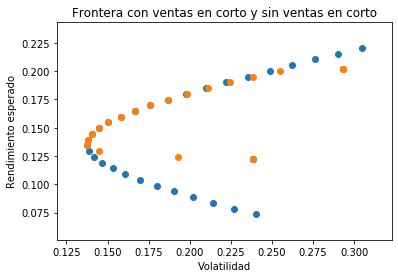

In [27]:
plt.scatter(frontera1["Desv. std portafolio (anual)"], frontera1["Rendimiento"]) #permite ventas en corto
plt.scatter(frontera2["Desv. std portafolio (anual)"], frontera2["Rendimiento"]) # no permite ventas en corto
plt.xlabel("Volatilidad")
plt.ylabel ("Rendimiento esperado")
plt.title("Frontera con ventas en corto y sin ventas en corto")


# 4. Encuentra el portafolio riesgoso óptimo (maximiza el coeficiente de Sharpe)

In [28]:
min_sharpe = lambda pesos: -(np.sum(pesos * rend_activos) - rf) / np.sqrt(np.matrix(pesos)* np.matrix(var) * np.matrix(pesos).T * 252) # función objetivo
rf = .05
accion = datos.columns[1:-1]
def sharpe (pesos, corto):
    
    suma = lambda pesos: 1 - sum(pesos) #los pesos deben sumar uno
    cons   = ({'type':'eq','fun':suma})
        
    # limites (bounds)
    if corto =="permitido":
        b    = (-1,1) 
    elif corto == "no permitido":
        b    = (0,1) 
    
    bnds = (b, b, b, b,b,b,b)
    sol  = minimize(min_sharpe,# minimize
            pesos,
            bounds      = bnds,
            constraints = cons)
        
    
    var_port_anual = np.matrix(sol["x"])* np.matrix(var) * np.matrix(sol["x"]).T * 252
    desv_port_anual = (float(np.sqrt(var_port_anual)))
    pesos_optimos = (sol["x"])
    rendimiento = np.sum(sol["x"] * rend_activos)
    sharpe = (rendimiento - rf)/ desv_port_anual
    
    tabla_sharpe = {
        "Pesos optimos" : sol["x"],
        "Desv. std" : desv_port_anual,
        "Rendimiento" : rendimiento,
        "Sharpe" :sharpe

        
    }
    
    
    return(tabla_sharpe)

In [44]:
accion = datos.columns[1:-1]
sol_sharpe = sharpe (pesos, "no permitido") 

print("Rendimiento: ",sol_sharpe["Rendimiento"])
print("Desv. std: ",sol_sharpe ["Desv. std"])
print("Sharpe: ",sol_sharpe ["Sharpe"])
print("Pesos del portafolio:")
pd.DataFrame([sol_sharpe ["Pesos optimos"]],columns= accion)


Rendimiento:  0.15702768781043175
Desv. std:  0.1538410280856405
Sharpe:  0.6957031498180796
Pesos del portafolio:


,ASURB MF Equity,GFNORTEO MF Equity,PE&OLES* MF Equity,WALMEX* MF Equity,IENOVA* MF Equity,CEMEXCPO MF Equity,FEMSAUBD MF Equity
0,0.123766,0.184502,0.05068,0.162331,0.059075,0.157852,0.261796


Text(0.5, 1.0, 'Se permiten ventas en corto')

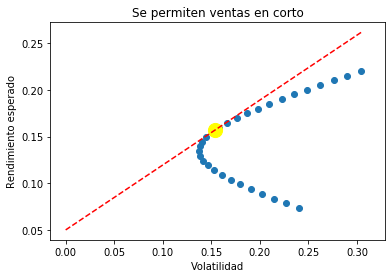

In [45]:
x = np.linspace(0, max(frontera1["Desv. std portafolio (anual)"]), 30) 
recta = rf + x * sol_sharpe["Sharpe"] 
plt.scatter(frontera1["Desv. std portafolio (anual)"], frontera1["Rendimiento"]) #permite ventas en corto
plt.plot(x, recta, c = "red", linestyle='--')
plt.scatter(sol_sharpe["Desv. std"],sol_sharpe["Rendimiento"], marker = "o", c= "yellow", s = 200)
plt.xlabel("Volatilidad")
plt.ylabel ("Rendimiento esperado")
plt.title( "Se permiten ventas en corto")

# 5. Calcula el VaR paramétrico del portafolio riesgoso óptimo (1 día, 95% de confianza)

In [46]:
def VaR(confianza, monto, vol_anual, tipo_VaR):
    F = norm.ppf(confianza)
    
    if tipo_VaR == "diario":
        VaR = F * monto * (vol_anual / np.sqrt(252))
    elif tipo_VaR == "anual":
        VaR = F * monto * vol_anual
        
    return(VaR)

In [47]:
monto, confianza, tipo_VaR = 10000, .95, "diario"
vol_anual = sol_sharpe ["Desv. std"]
print( "El VaR a un día con un nivel de confianza del 95% es:", VaR(confianza, monto, vol_anual, tipo_VaR))

El VaR a un día con un nivel de confianza del 95% es: 159.40397973306943


# BONUS POINT: Elige los porcentajes a invertir en el portafolio riesgoso óptimo y el activo libre de riesgo (maximizar la función de utilidad)

In [48]:
A = 3
y_star = (sol_sharpe ["Rendimiento"] - rf) / (A * sol_sharpe["Desv. std"]**2)
rendimiento_total = y_star * sol_sharpe ["Rendimiento"] + (1-y_star) * rf
print("El rendimiento total de la cartera es:", rendimiento_total)

El rendimiento total de la cartera es: 0.2113342908889324


In [49]:
print("En activo libre de riesgo se invierte:", rf * (1 - y_star), "y,")
print("en activo riesgoso se invierten los pesos: ")
pd.DataFrame([sol_sharpe ["Pesos optimos"]* y_star],columns= accion)


En activo libre de riesgo se invierte: -0.025370352377736563 y,
en activo riesgoso se invierten los pesos: 


,ASURB MF Equity,GFNORTEO MF Equity,PE&OLES* MF Equity,WALMEX* MF Equity,IENOVA* MF Equity,CEMEXCPO MF Equity,FEMSAUBD MF Equity
0,0.186565,0.278119,0.076395,0.244699,0.089049,0.237947,0.394633
